In [77]:
from pathlib import Path

NOTEBOOK_DIR = Path.cwd()
BASE_DIR = NOTEBOOK_DIR.parents[1]


from utils.gender_utils import split_utkface_by_gender

# print(BASE_DIR)
split_utkface_by_gender(BASE_DIR)

In [ ]:
# import os
# import shutil
# from pathlib import Path

# # Notebook location
# NOTEBOOK_DIR = Path.cwd()

# # Go UP two levels → "deep learning"
# BASE_DIR = NOTEBOOK_DIR.parents[1]

# GLOBAL_DATA = BASE_DIR / "data"
# UTK_FACE_DATA_PATH = GLOBAL_DATA / "data-global" / "UTKFace"
# GENDER_DIR = GLOBAL_DATA / "gender-data"
# FEMALE_DATA_PATH = GENDER_DIR / "female"
# MALE_DATA_PATH = GENDER_DIR / "male"

# # Create gender directories if they don't exist
# FEMALE_DATA_PATH.mkdir(parents=True, exist_ok=True)
# MALE_DATA_PATH.mkdir(parents=True, exist_ok=True)

# # Mapping: label → destination folder
# gender_map = {"1": FEMALE_DATA_PATH, "0": MALE_DATA_PATH}

# for image_file in UTK_FACE_DATA_PATH.iterdir():
#     images_ext = ["png", "jpg", "peng"]
#     file_extension = image_file.name.split(".")[-1]

#     if file_extension not in images_ext:
#         print(f"Skipping mal file type: {image_file.name}")
#         continue

#     if not image_file.is_file():
#         continue

#     parts = image_file.name.split("_")
#     if len(parts) < 2:
#         print(f"Skipping malformed filename: {image_file.name}")
#         continue

#     gender_label = parts[1]

#     # Skip images with unknown gender labels
#     if gender_label not in gender_map:
#         print(f"Skipping unknown label file: {image_file.name}")
#         continue

#     destination_folder = gender_map[gender_label]
#     destination_path = destination_folder / image_file.name

#     if not destination_path.exists():
#         shutil.copy(image_file, destination_path)


Skipping mal file type: 1_0_4_jdjdkdkdkd.txt
Skipping mal file type: 1_0_4_hdjd.txt


In [39]:
print(f"Global data length: {len(os.listdir(UTK_FACE_DATA_PATH))}")
print(f"Female data length: {len(os.listdir(FEMALE_DATA_PATH))}")
print(f"Male data length: {len(os.listdir(MALE_DATA_PATH))}")

print(len(os.listdir(MALE_DATA_PATH)) + len(os.listdir(FEMALE_DATA_PATH)))

Global data length: 23710
Female data length: 11317
Male data length: 12394
23711


In [ ]:
import tensorflow as tf
BATCH = 32
IMG_SIZE = (200, 200)

train_data = tf.keras.utils.image_dataset_from_directory(
    GENDER_DIR ,
    labels="inferred",
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

val_data = tf.keras.utils.image_dataset_from_directory(
    GENDER_DIR ,
    labels="inferred",
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)


class_names = train_data.class_names
print("Classes:", class_names)

Found 23708 files belonging to 2 classes.
Using 18967 files for training.
Found 23708 files belonging to 2 classes.
Using 4741 files for validation.
Classes: ['female', 'male']


In [41]:
class_names = train_data.class_names
class_names

['female', 'male']

In [42]:
images, labels = next(iter(train_data))
print("labels shape: ", labels.shape)
print("first 10 labels: ", labels[:10].numpy())

labels shape:  (32, 2)
first 10 labels:  [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [43]:
print(len(train_data))
print(len(val_data))

593
149


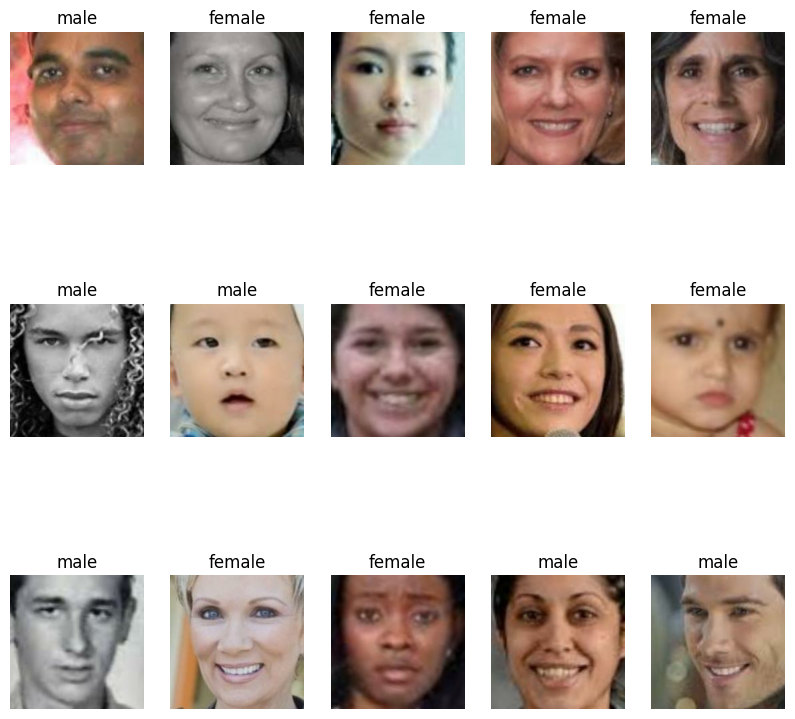

In [44]:
import matplotlib.pyplot as plt
import tensorflow as tf

class_names = train_data.class_names
plt.figure(figsize=(10, 10))

for images, labels in train_data.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        # convert one-hot label (e.g. [1., 0.]) → integer (0 or 1)
        label_index = tf.argmax(labels[i]).numpy()

        plt.title(class_names[label_index])


In [45]:
for image_batch, label_batch in val_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 200, 200, 3)
(32, 2)


In [54]:
from tensorflow.keras  import layers, models

gender_model_CNN = models.Sequential([
  layers.Rescaling(1./255, input_shape=(200, 200, 3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2,2)),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(2, activation='softmax')
])

gender_model_CNN.summary()

/home/hassan/Desktop/age-prediction/venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     4,333,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,429,922 (16.90 MB)

 Trainable params: 4,429,474 (16.90 MB)

 Non-trainable params: 448 (1.75 KB)

In [47]:
gender_model_CNN.compile(optimizer="adam",
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
    )

In [49]:
gender_model_CNN.fit(
  train_data,
  validation_data=val_data,
  epochs= 20,
  callbacks=[early_stopping]
)

Epoch 1/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 469s 788ms/step - accuracy: 0.7275 - loss: 0.7573 - val_accuracy: 0.8359 - val_loss: 0.3974
Epoch 2/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 429s 723ms/step - accuracy: 0.8089 - loss: 0.4133 - val_accuracy: 0.8561 - val_loss: 0.3275
Epoch 3/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 439s 741ms/step - accuracy: 0.8310 - loss: 0.3656 - val_accuracy: 0.6146 - val_loss: 0.7725
Epoch 4/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 451s 760ms/step - accuracy: 0.8487 - loss: 0.3322 - val_accuracy: 0.8646 - val_loss: 0.3102
Epoch 5/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 431s 726ms/step - accuracy: 0.8563 - loss: 0.3249 - val_accuracy: 0.8633 - val_loss: 0.3393
Epoch 6/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 475s 802ms/step - accuracy: 0.8536 - loss: 0.3315 - val_accuracy: 0.8749 - val_loss: 0.2911
Epoch 7/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 452s 762ms/step - accuracy: 0.8663 - loss: 0.3009 - val_accuracy: 0.8414 - val_loss: 0.3837
Epoch 8/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 431s 728ms/step - accuracy: 0.8683 -

In [52]:
scores = gender_model_CNN.evaluate(val_data)

149/149 ━━━━━━━━━━━━━━━━━━━━ 28s 187ms/step - accuracy: 0.8878 - loss: 0.2643


In [53]:
gender_model_CNN.save('../../models/gender_detection_model.keras')